In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mylib import autolabel_bar,axe_set_size

of = pd.read_csv("../P12-OfficeSupplies.csv")
of["Sales Price"] = of["Units"] * of["Unit Price"]
sales_by_rep_region = of.groupby(["Rep","Region"])["Sales Price"].sum().reset_index().sort_values(by=['Sales Price','Region','Rep'], ascending= False)
regions = sales_by_rep_region.groupby(["Region"])["Region"].count()
sales_by_rep_region.head(4)


,Rep,Region,Sales Price
3,Matthew,Central,3109.44
9,Susan,East,3102.30
0,Alex,Central,2812.19
7,Richard,East,2363.04


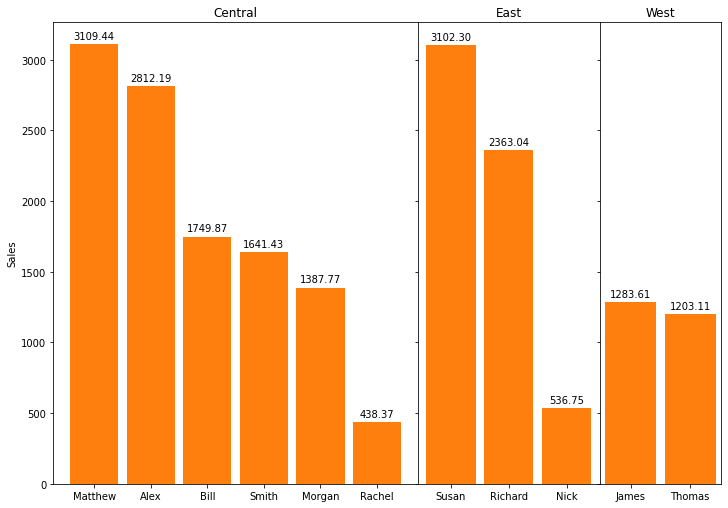

In [2]:
width = 0.3  # the width of the bars
fig = plt.figure()
gs = fig.add_gridspec(ncols=regions.size, wspace=0, width_ratios=regions.values)
axes = gs.subplots(sharey=True)

fig.set_figwidth(10)
fig.set_figheight(7)
fig.tight_layout()

axes[0].set_ylabel('Sales')
i = 0
for region in regions.index.values:
    ax = axes[i]
    data = sales_by_rep_region[sales_by_rep_region.Region == region]

    x =list(map(lambda i: i*0.35, np.arange(data.Rep.size)))
    bars = ax.bar(x,data["Sales Price"].values, width,color ='C1')
    autolabel_bar(bars,ax)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(region)
    ax.set_xticks(x)
    ax.set_xticklabels(data.Rep.values)
    i+=1



plt.show()